In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [87]:
bench = pd.read_csv('results/GEP/baseline.csv', index_col=0)
MIMO_full = pd.read_csv('results/GEP/fulldata10_LSTM.csv', index_col=0)
temp = pd.read_csv('results/GEP/Temp_LSTM.csv', index_col=0)
MIMO = pd.read_csv('results/GEP/LSTM_MIMO10.csv', index_col=0)
condRNN = pd.read_csv('results/GEP/ConditionalRNN10_sequential.csv', index_col=0)
datasets = [MIMO, condRNN, MIMO_full, temp, bench]

In [88]:
#condRNN = condRNN.drop(condRNN.index[:11]).reset_index(drop=True)
temp = temp.drop(temp.index[:1]).reset_index(drop=True)
MIMO = MIMO.drop(MIMO.index[:1]).reset_index(drop=True)
MIMO_full = MIMO_full.drop(MIMO_full.index[:1]).reset_index(drop=True)
condRNN = condRNN.drop(condRNN.index[:1]).reset_index(drop=True)

In [17]:
bench.head(20)

,mape,rmse,B
0,3.385965,5.859511,GEP1
1,1.379325,2.135470,GEP2
2,1.732453,2.937556,GEP4


In [46]:
means = []
stds = []
datasets2 = [MIMO, condRNN, MIMO_full, bench]
#means.append(35.58681558224254)
#stds.append(0)
for df in datasets2:
    #means.append(df['mape'].mean())
    #stds.append(df['mape'].std())
    means.append(df['rmse'].mean())
    stds.append(df['rmse'].mean())

In [47]:
means

[4.178946466231139, 3.473690737291912, 3.2187884393455795, 3.6441788334682266]

B
GEP1    7.120801
GEP2    2.126464
GEP4    3.289574
Name: rmse, dtype: float64
B
GEP1    0.499471
GEP2    0.066575
GEP4    0.110373
Name: rmse, dtype: float64
B
GEP1    5.597697
GEP2    1.904215
GEP4    2.919160
Name: rmse, dtype: float64
B
GEP1    0.228941
GEP2    0.047383
GEP4    0.072323
Name: rmse, dtype: float64
B
GEP1    4.925596
GEP2    1.714734
GEP4    3.016035
Name: rmse, dtype: float64
B
GEP1    0.123157
GEP2    0.020162
GEP4    0.029879
Name: rmse, dtype: float64
B
GEP1    5.651585
GEP2    2.239268
GEP4    0.000000
Name: rmse, dtype: float64
B
GEP1    0.312138
GEP2    0.028360
GEP4    0.000000
Name: rmse, dtype: float64
B
GEP1    5.859511
GEP2    2.135470
GEP4    2.937556
Name: rmse, dtype: float64
B
GEP1   NaN
GEP2   NaN
GEP4   NaN
Name: rmse, dtype: float64


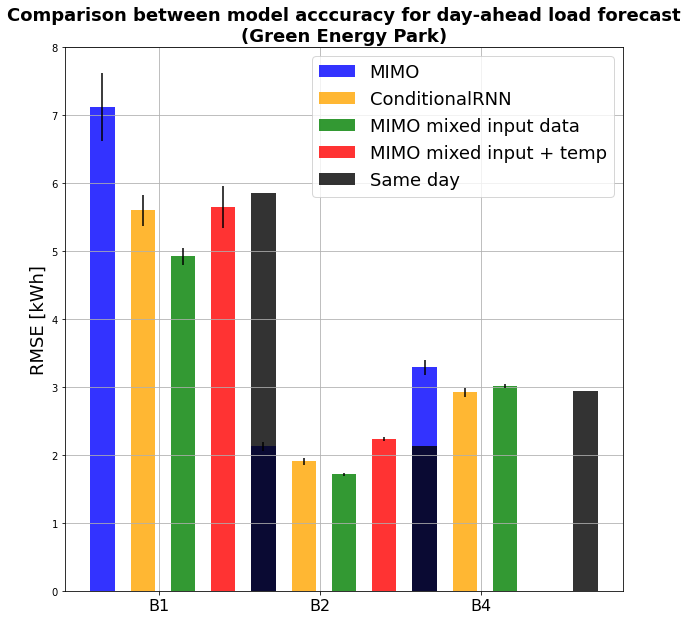

In [95]:
fig, ax = plt.subplots()
colors=["blue", "orange", "green", 'red', "black"]
labels = ['MIMO', 'ConditionalRNN', 'MIMO mixed input data', 'MIMO mixed input + temp', 'Same day']
x = np.array(range(1,7,2))
for i,df in enumerate(datasets):
    means = df.groupby('B')['rmse'].mean()
    stds = df.groupby('B')['rmse'].std()
    if i == 3:
        means.loc['GEP4']=0
        stds.loc['GEP4']=0
    print(means)
    print(stds)
    ax.bar(x-0.4, means, yerr=stds, alpha=0.8, width=0.3, label=labels[i], color=colors[i])
    x = x+0.4
#i = 3
#ax.bar(x-0.4, bench['rmse'], alpha=0.8, width=0.3, label=labels[i], color=colors[i])
plt.xticks(ticks=np.array(range(1,7,2))+0.2, labels=['B1','B2','B4'], fontsize=16)
plt.title('Comparison between model acccuracy for day-ahead load forecast\n(Green Energy Park)', fontsize=18, fontweight='bold')
plt.ylabel('RMSE [kWh]', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

No handles with labels found to put in legend.


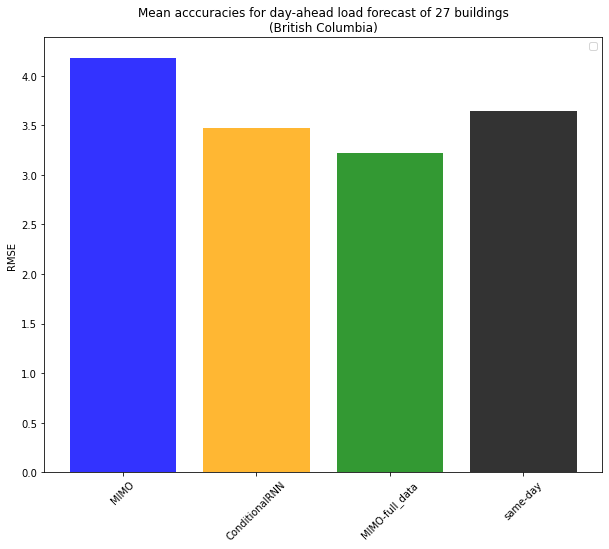

In [48]:
plt.rcParams['figure.figsize'] = (10, 8)
colors=["blue", "orange", "green", "black"]
labels = ['MIMO', 'ConditionalRNN', 'MIMO-full_data', 'same-day']
#plt.grid(zorder=0)
plt.bar(range(len(means)), means, align='center', color=colors, alpha=0.8, zorder=1)
plt.xticks(ticks=range(len(means)), labels=labels,
           rotation=45)
plt.title('Mean acccuracies for day-ahead load forecast of 27 buildings\n(British Columbia)')
plt.ylabel('RMSE')
plt.legend()
plt.show()